<a href="https://colab.research.google.com/github/justjstine/CCMACLRL_EXERCISES_COM232/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 90 images of your self (selfied are recommended) in the Train folder
- Upload 90 images of your partner in the Train folder
- Upload 20 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [ ]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

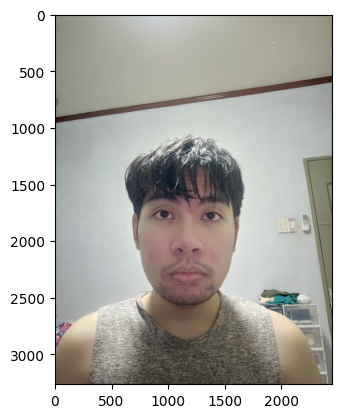

In [38]:
def displayImage(image_path):
  image = Image.open(image_path)

  plt.imshow(image)
  plt.axis('on')
  plt.show()

displayImage('/content/drive/MyDrive/Images/Train/Almadrones/IMG_20250922_014341_322.jpg')

## 2. Load the images from your drive and apply preprocessing to your raw images

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            images.append(img.flatten())
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [ ]:
images, labels = load_images_from_folder('/content/drive/MyDrive/Images/Train')

In [ ]:
images.shape

(180, 10000)

In [ ]:
labels.shape

(180,)

In [ ]:
labels

array(['Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almadrones',
       'Almadrones', 'Almadrones', 'Almadrones', 'Almad

## 3. Display one pre-processed image from the training set

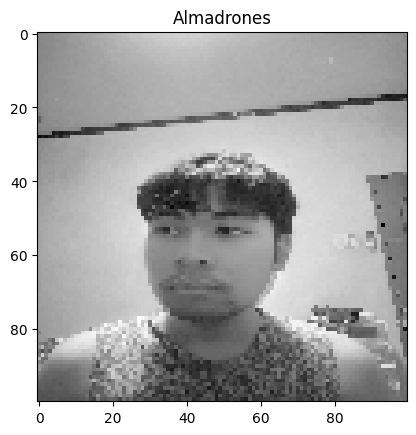

In [ ]:
image = images[0].reshape(100,100)
name = labels[0]

plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')
plt.show()

## 4. Display ten pre-processed images from the training set

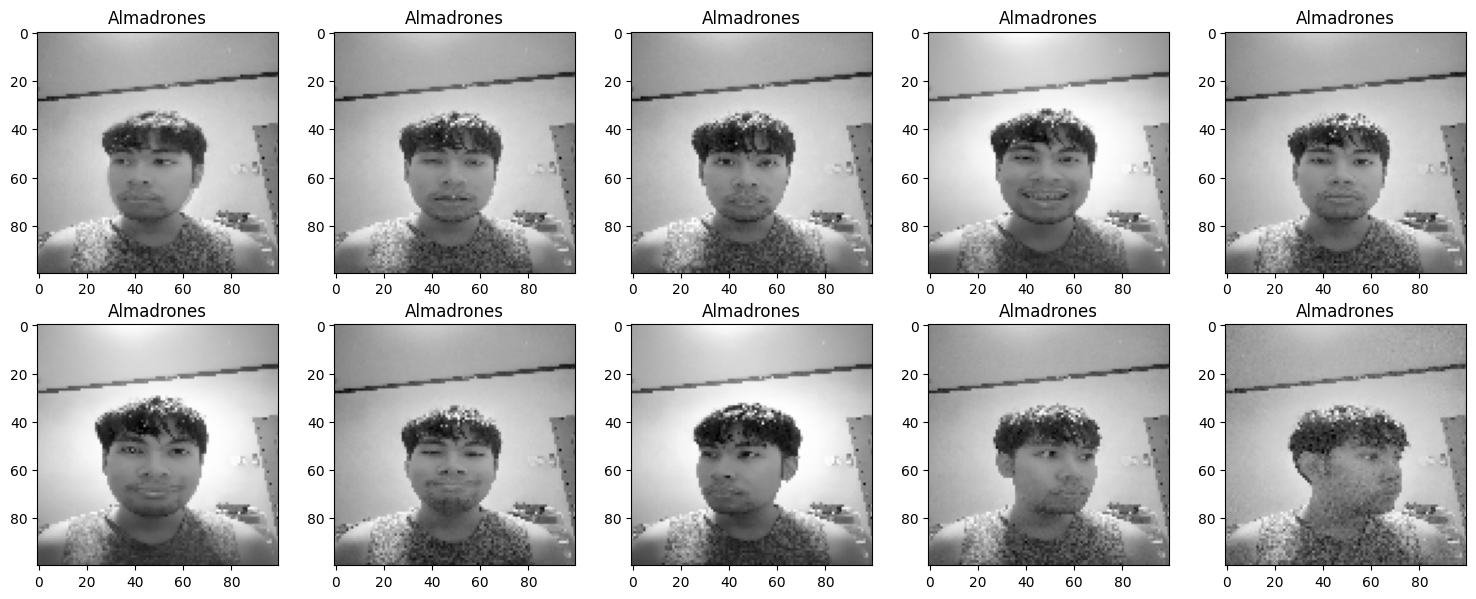

In [ ]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(num_faces):
    image = images[i].reshape(100,100)
    name = labels[i]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('on')

plt.tight_layout()
plt.show()

## 5. Split your training data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


## 6. Train your SVM model

In [ ]:
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)


SVC()

## 7. Evaluate your SVM model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [ ]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction


Predicted label: ['Almadrones']


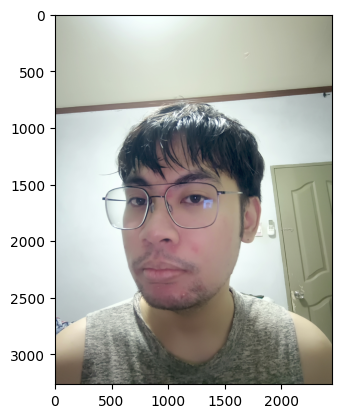

In [41]:
img_path = '/content/drive/MyDrive/Images/Test/IMG_20250922_014714_289.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)


Predicted label: ['Dela Paz']


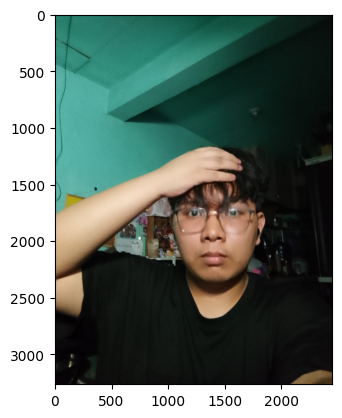

In [43]:
img_path = '/content/drive/MyDrive/Images/Test/IMG_20250921_220832_869.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)